<a href="https://colab.research.google.com/github/salmanhiro/Star-Counter/blob/master/Star_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Star Counter

Hey, I heard that you like to count stars before going to sleep. Here you go!

![Stars](https://s3-assets.eastidahonews.com/wp-content/uploads/2018/05/24095241/starry-background-universe-adobe.jpeg)


So, to make it easier, let's automatise this work!




Reference: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e


## Download the sample image

Or you could simply upload your own photo of backyard sky

In [88]:
!wget https://s3-assets.eastidahonews.com/wp-content/uploads/2018/05/24095241/starry-background-universe-adobe.jpeg

--2020-07-12 08:48:18--  https://s3-assets.eastidahonews.com/wp-content/uploads/2018/05/24095241/starry-background-universe-adobe.jpeg
Resolving s3-assets.eastidahonews.com (s3-assets.eastidahonews.com)... 13.35.111.68, 13.35.111.48, 13.35.111.8, ...
Connecting to s3-assets.eastidahonews.com (s3-assets.eastidahonews.com)|13.35.111.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85003 (83K) [image/jpeg]
Saving to: ‘starry-background-universe-adobe.jpeg.1’

starry-background-u 100%[===================>]  83.01K  --.-KB/s    in 0.05s   

2020-07-12 08:48:18 (1.68 MB/s) - ‘starry-background-universe-adobe.jpeg.1’ saved [85003/85003]



# Using OpenCV

In [89]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

original = cv2.imread('/content/starry-background-universe-adobe.jpeg')

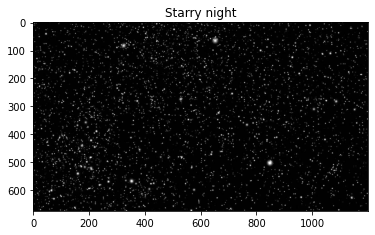

In [94]:
# Convert image in grayscale
gray_im = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.title('Starry night')
plt.imshow(gray_im, cmap = 'gray')

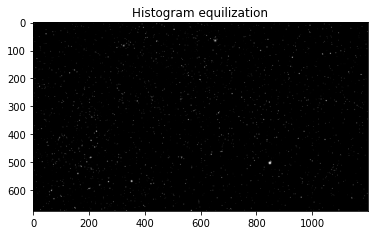

In [91]:
# Contrast adjusting with histogramm equalization
gray_equ = cv2.equalizeHist(gray_im)
plt.title('Histogram equilization')
plt.imshow(gray_correct, cmap = 'gray')

# Give a correction for reducing the sky noise

We love the dark sky

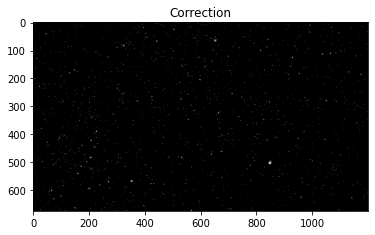

In [92]:
# Determining gamma correction for brightness of stars

gray_correct = np.array(255 * (gray_im / 255) ** 5 , dtype='uint8')
plt.title('Correction')
plt.imshow(gray_correct, cmap = 'gray')


# There are so much!

objects number is: 2981


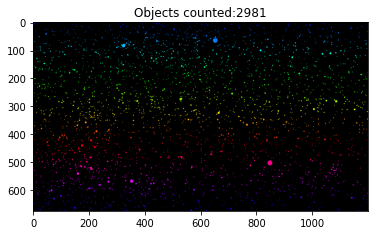

In [93]:
# Counting stars

ret, labels = cv2.connectedComponents(gray_correct)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()